In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay

In [37]:
df=pd.read_csv('emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [38]:
df.isna().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

<Axes: xlabel='Prediction', ylabel='count'>

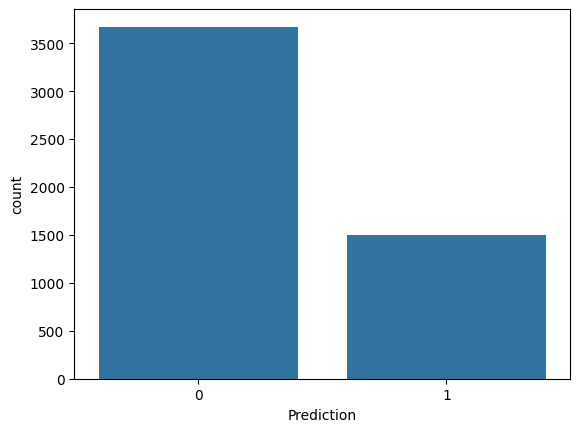

In [39]:
sns.countplot(data=df,x='Prediction')

In [40]:
x=df.iloc[:,1:3000]
x
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
xtrain.shape
xtest.shape

(1552, 2999)

In [42]:
def perf(ypred):
    print('Precision: ',precision_score(ytest,ypred))
    print('Recall: ',recall_score(ytest,ypred))
    print('Accuracy: ',accuracy_score(ytest,ypred))
    print('F1: ',f1_score(ytest,ypred))
    print('Classification report: ',classification_report(ytest,ypred))
    print('Confusion matrix: ',confusion_matrix(ytest,ypred))
    cm=confusion_matrix(ytest,ypred)
    cmd=ConfusionMatrixDisplay(cm)
    cmd.plot()

Precision:  0.8626373626373627
Recall:  0.35600907029478457
Accuracy:  0.8009020618556701
F1:  0.5040128410914928
Classification report:                precision    recall  f1-score   support

           0       0.79      0.98      0.88      1111
           1       0.86      0.36      0.50       441

    accuracy                           0.80      1552
   macro avg       0.83      0.67      0.69      1552
weighted avg       0.81      0.80      0.77      1552

Confusion matrix:  [[1086   25]
 [ 284  157]]


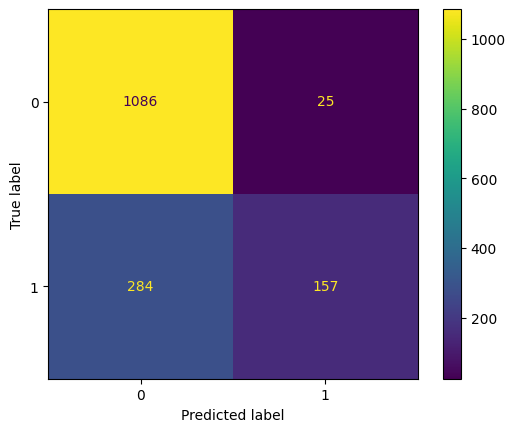

In [43]:
svc=SVC()
svc.fit(xtrain,ytrain)
svcypred=svc.predict(xtest)
perf(svcypred)

Precision:  0.7182539682539683
Recall:  0.8208616780045351
Accuracy:  0.8576030927835051
F1:  0.7661375661375661
Classification report:                precision    recall  f1-score   support

           0       0.92      0.87      0.90      1111
           1       0.72      0.82      0.77       441

    accuracy                           0.86      1552
   macro avg       0.82      0.85      0.83      1552
weighted avg       0.87      0.86      0.86      1552

Confusion matrix:  [[969 142]
 [ 79 362]]


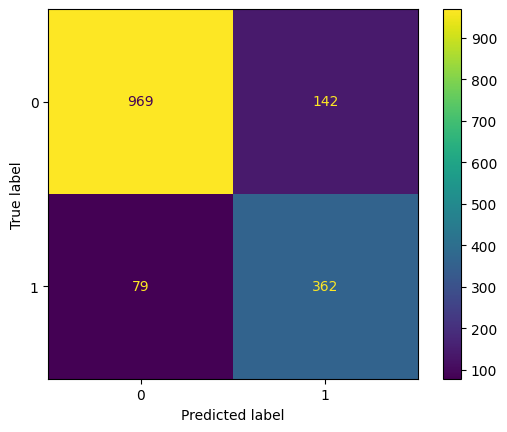

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
knnypred = knn.predict(xtest)
perf(knnypred)